# DATA LENDING CLUB (PRACTICA 1)

El primer paso para la realización de esta práctica es importar los paquetes y las librerías necesarias para comenzar el tratamiento de los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Después, importamos la información que contiene nuestra base de datos. 

In [2]:
df = pd.read_csv('pd_data_initial_preprocessing.csv')
df.head()

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,112435993,https://lendingclub.com/browse/loanDetail.acti...,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,112290210,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,112436985,https://lendingclub.com/browse/loanDetail.acti...,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,112439006,https://lendingclub.com/browse/loanDetail.acti...,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,112438929,https://lendingclub.com/browse/loanDetail.acti...,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


Para saber cuántas observaciones y variables contiene nuestro dataframe, ejecutamos el comando `df.shape`. Este comando nos devuelve una tupla con el número de filas y columnas del dataframe.

In [3]:
df.shape

(884884, 51)

Por tanto, nuestro dataframe contiene 884884 observaciones y 51 variables.

# ANÁLISIS DESCRIPTIVO

En este apartado se hará un pequeño análisis descriptivo de los datos siguiendo los puntos del enunciado.

Para saber la cantidad de valores nulos de cada una de las variables usamos la función `df.isnull().sum()`

In [4]:
#Cantidad de datos nulos por columna, es decir, por cada variable.
df.isnull().sum()
#Otra opcion es:
#df.isna().sum()

id                                     0
url                                    8
zip_code                               8
mths_since_last_record            729784
il_util                           668303
mths_since_recent_bc_dlq          659450
mths_since_rcnt_il                642111
all_util                          635387
inq_fi                            635360
max_bal_bc                        635360
total_cu_tl                       635360
open_acc_6m                       635360
open_act_il                       635360
open_il_12m                       635360
total_bal_il                      635360
open_rv_12m                       635360
open_rv_24m                       635360
open_il_24m                       635360
inq_last_12m                      635360
mths_since_last_major_derog       633271
mths_since_recent_revol_delinq    569050
mths_since_last_delinq            431435
emp_title                          52701
emp_length                         51201
mo_sin_old_il_ac

El tipo de cada variable se obtiene con `df.dtypes`

In [5]:
#Tipos de variable
df.dtypes

id                                 object
url                                object
zip_code                           object
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_title                          object
emp_length                        

A continuación, obtenemos la distribución de la variable objetivo `loan_status` . Esta variable es una variable del tipo object. Además, dicha distribución se representará en un gráfico. 

In [6]:
#Distribucion de la variable tipo object
df['loan_status'].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

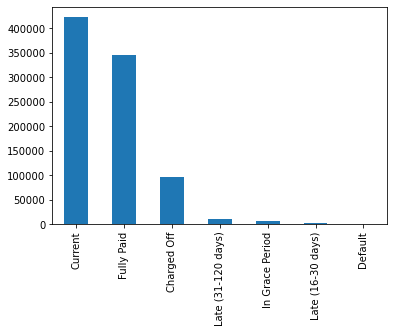

In [7]:
plot = df['loan_status'].value_counts().plot(kind = 'bar')

Por último, se realizará la **matriz de correlaciones** con las variables continuas.

In [8]:
matriz_correlaciones = df.corr()
matriz_correlaciones.style.background_gradient()

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,open_il_12m,total_bal_il,open_rv_12m,open_rv_24m,open_il_24m,inq_last_12m,mths_since_last_major_derog,mths_since_recent_revol_delinq,mths_since_last_delinq,emp_length,mo_sin_old_il_acct,revol_util,dti,annual_inc,sub_grade,term,int_rate,installment,total_acc,fico_range_low,fico_range_high,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
mths_since_last_record,1.000000,-0.037540,-0.057360,-0.032272,-0.014922,-0.042597,0.000346,0.004893,-0.055815,-0.002077,-0.001326,-0.003023,-0.104838,-0.115880,0.020599,-0.066671,0.036692,-0.074116,-0.035102,0.027933,-0.063511,0.046660,0.063109,-0.079275,0.008761,0.037984,-0.001758,-0.016476,-0.159056,0.210486,0.210486,-0.271428,0.237999,-0.005499,-0.126552,-0.130708,0.032690,0.003539,0.122281
il_util,-0.037540,1.000000,0.060892,-0.279929,0.593590,0.150360,-0.112540,0.028667,0.165298,0.328907,0.328236,0.334039,0.068071,0.076814,0.300043,0.167643,-0.003623,0.059719,0.044520,-0.109813,0.002828,-0.053167,-0.013754,-0.051043,0.042975,0.016406,0.157807,-0.087767,0.118818,-0.131003,-0.131003,0.014497,0.016969,-0.097055,-0.047261,-0.110368,0.135907,0.019291,0.084515
mths_since_recent_bc_dlq,-0.057360,0.060892,1.000000,-0.031998,0.044862,0.036750,-0.017689,0.005231,0.069360,-0.017298,0.058731,0.005861,0.092337,0.131576,0.069339,0.041929,0.564954,0.889991,0.767427,0.013651,-0.004234,0.004577,0.007820,-0.042323,0.000750,-0.007866,0.007795,-0.045078,0.014722,-0.004356,-0.004356,0.116538,0.141381,-0.047508,-0.020753,0.002736,-0.018812,0.001701,-0.000433
mths_since_rcnt_il,-0.032272,-0.279929,-0.031998,1.000000,-0.121841,-0.210663,0.017891,-0.140431,-0.184580,-0.212217,-0.445132,-0.238783,-0.029961,-0.044192,-0.488463,-0.201590,-0.042589,-0.027812,-0.018482,-0.021516,0.063138,0.062440,-0.119586,-0.020215,-0.009079,-0.038663,-0.073163,-0.021756,-0.190807,-0.021591,-0.021588,-0.013397,-0.028170,-0.021203,-0.064018,0.036113,-0.154603,0.001690,-0.046849
all_util,-0.014922,0.593590,0.044862,-0.121841,1.000000,0.077283,0.125339,0.045566,-0.056383,0.375587,0.180031,0.293259,-0.148592,-0.163547,0.198310,0.026702,-0.014816,0.049720,0.022631,-0.068392,0.056582,0.651858,0.104644,0.002877,0.088661,0.059681,0.265741,0.026710,-0.002668,-0.427142,-0.427143,-0.017093,-0.024774,0.008626,-0.033800,-0.091511,-0.006149,0.020473,0.060016
inq_fi,-0.042597,0.150360,0.036750,-0.210663,0.077283,1.000000,-0.080155,0.085965,0.154810,0.085837,0.283379,0.143728,0.096117,0.131095,0.360183,0.555460,-0.008159,0.032257,0.001937,0.003101,0.006359,-0.072383,0.045580,0.016961,0.036874,0.019109,0.161102,0.010568,0.160424,-0.082352,-0.082353,0.062950,0.069057,-0.005323,0.095614,-0.041625,0.103958,-0.000904,0.028889
max_bal_bc,0.000346,-0.112540,-0.017689,0.017891,0.125339,-0.080155,1.000000,-0.009401,-0.082341,0.022062,-0.045040,0.106198,-0.098054,-0.112157,-0.032194,-0.075932,0.043480,-0.006496,0.012532,0.060388,0.114574,0.314826,0.068982,0.095123,-0.008692,0.121700,-0.059788,0.361556,0.137151,0.061076,0.061070,-0.101392,-0.116872,0.388533,0.230375,0.230835,0.118276,-0.008780,-0.208462
total_cu_tl,0.004893,0.028667,0.005231,-0.140431,0.045566,0.085965,-0.009401,1.000000,0.082488,0.072386,0.188601,0.110382,0.007583,0.010550,0.258066,0.076495,-0.005189,-0.008793,-0.009595,0.077423,0.111364,0.028929,0.072138,0.015441,0.005417,0.060197,0.016622,0.062481,0.281562,0.006084,0.006083,-0.001744,0.016141,0.074835,0.179413,0.061243,0.099378,-0.003978,-0.054601
open_acc_6m,-0.055815,0.165298,0.069360,-0.184580,-0.056383,0.154810,-0.082341,0.082488,1.000000,0.060527,0.345889,0.102495,0.622292,0.476662,0.258347,0.313227,0.032600,0.058644,0.046483,0.023881,0.021981,-0.190717,0.013978,0.011953,0.027508,-0.001339,0.151162,-0.002643,0.251915,-0.057584,-0.057586,0.054268,0.055810,-0.023191,0.063408,-0.002444,0.271011,-0.001395,-0.011898
open_act_il,-0.00

# SELECCIÓN DE VARIABLES

Antes de comenzar con el tratamiento de valores missing se va a proceder a la selección de las variables que vamos a usar para el análisis. Lo primero que haremos será ver el porcentaje de datos missing que hay en cada variable.

In [5]:
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
datos_missing = pd.concat([porcentaje], axis=1, keys=["Porcentaje"])
datos_missing

,Porcentaje
mths_since_last_record,82.472279
il_util,75.524363
mths_since_recent_bc_dlq,74.523892
mths_since_rcnt_il,72.564427
all_util,71.804553
open_act_il,71.801502
open_acc_6m,71.801502
open_il_24m,71.801502
open_rv_24m,71.801502
open_rv_12m,71.801502


Una vez hemos calculado el porcentaje de datos missing de cada una de las variables, eliminaremos aquellas que tengan **alrededor del 50 por ciento de valores missing**.

In [6]:
df.drop(["mths_since_last_record", "il_util", "mths_since_recent_bc_dlq", "mths_since_rcnt_il", "all_util", "open_act_il", 
         "open_acc_6m", "open_il_24m", "open_rv_24m", "open_rv_12m", "total_bal_il", "open_il_12m", "max_bal_bc", "total_cu_tl",
         "inq_fi", "inq_last_12m", "mths_since_last_major_derog", "mths_since_recent_revol_delinq", "mths_since_last_delinq"], axis=1, inplace=True)

Además de dichas variables también se eliminarán las siguientes variables por diferentes razones:
- Variable `url`: no aporta información útil.
- Variable `id`: códigos que aportan información individual. 
- Variable `zip code` y `addr_state`. Ambas aportan información relativamente igual por tanto nos quedaremos con `addr_state` eliminando la variable `zip code`. 
- Variables `grade` y `sub_grade`. La información de la variable `grade` está incluida implicitamente en la variable `subgrade` por tanto eliminaremos la variable `grade`.


In [7]:
df.drop(["url", "id", "zip_code", "grade"], axis=1, inplace=True)

Una vez eliminadas las variables anteriores, se produce a una extracción de aquellas variables que encontramos más interesantes para nuestro estudio. El resto de las variables se eliminan a continuación.

In [8]:
variables = ["addr_state", "annual_inc", "dti", "emp_length", "emp_title", "fico_range_high", "fico_range_low", 
             "home_ownership", "initial_list_status", "installment", "int_rate", "loan_amnt", "mort_acc", "open_acc", 
             "pub_rec_bankruptcies", "pub_rec", "purpose", "sub_grade", "term", "total_acc", "loan_status"]

In [9]:
variables_eliminadas = [col for col in df.columns if col not in variables]
print(variables_eliminadas)

['mo_sin_old_il_acct', 'revol_util', 'verification_status', 'application_type', 'mo_sin_old_rev_tl_op', 'earliest_cr_line_month', 'earliest_cr_line_year']


In [10]:
df.drop(['mo_sin_old_il_acct', 'revol_util', 'verification_status', 'application_type', 'mo_sin_old_rev_tl_op', 'open_acc', 
        'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)

In [11]:
df.shape

(884884, 20)

Después de la eliminación de algunas variables obtenemos el dataframe que usaremos en nuestro análisis. Nuestro dataframe contiene 20 variables en total.

# TRATAMIENTO DE VALORES MISSING

Se importa la librería necesaria para imputar los valores.

In [12]:
from sklearn.impute import SimpleImputer

En el caso de que las variables continuas, los valores missing se sustituyen por la mediana.

In [13]:
# dti
dti_values = df.dti.values.reshape(-1,1)
imp_cont = SimpleImputer(missing_values=np.nan, strategy = 'median')
imp_cont.fit(dti_values)
transformed_values_dti = imp_cont.transform(dti_values)

df.dti = transformed_values_dti

In [14]:
# annual_inc
annual_inc_values = df.annual_inc.values.reshape(-1,1)
imp_cont.fit(annual_inc_values)
transformed_values_annual_inc = imp_cont.transform(annual_inc_values)

df.annual_inc = transformed_values_annual_inc

In [15]:
# int_rate
int_rate_values = df.int_rate.values.reshape(-1,1)
imp_cont.fit(int_rate_values)
transformed_values_int_rate = imp_cont.transform(int_rate_values)

df.int_rate = transformed_values_int_rate

In [16]:
# installment
installment_values = df.installment.values.reshape(-1,1)
imp_cont.fit(installment_values)
transformed_values_installment = imp_cont.transform(installment_values)

df.installment = transformed_values_installment

In [17]:
# loan_amnt
loan_amnt_values = df.loan_amnt.values.reshape(-1,1)
imp_cont.fit(loan_amnt_values)
transformed_values_loan_amnt = imp_cont.transform(loan_amnt_values)

df.loan_amnt = transformed_values_loan_amnt

Si las variables son discretas, se sustituirán los missing por la moda.

In [18]:
# emp_length
emp_length_values = df.emp_length.values.reshape(-1,1)
imp_disc = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imp_disc.fit(emp_length_values)
transformed_values_emp_length = imp_disc.transform(emp_length_values)

df.emp_length = transformed_values_emp_length

In [19]:
# sub_grade
sub_grade_values = df.sub_grade.values.reshape(-1,1)
imp_disc.fit(sub_grade_values)
transformed_values_sub_grade = imp_disc.transform(sub_grade_values)

df.sub_grade = transformed_values_sub_grade

In [20]:
# term
term_values = df.term.values.reshape(-1,1)
imp_disc.fit(term_values)
transformed_values_term = imp_disc.transform(term_values)

df.term = transformed_values_term

In [21]:
# total_acc
total_acc_values = df.total_acc.values.reshape(-1,1)
imp_disc.fit(total_acc_values)
transformed_values_total_acc = imp_disc.transform(total_acc_values)

df.total_acc = transformed_values_total_acc

In [22]:
# fico_range_low
fico_range_low_values = df.fico_range_low.values.reshape(-1,1)
imp_disc.fit(fico_range_low_values)
transformed_values_fico_range_low = imp_disc.transform(fico_range_low_values)

df.fico_range_low = transformed_values_fico_range_low

In [23]:
# fico_range_high
fico_range_high_values = df.fico_range_high.values.reshape(-1,1)
imp_disc.fit(fico_range_high_values)
transformed_values_fico_range_high = imp_disc.transform(fico_range_high_values)

df.fico_range_high = transformed_values_fico_range_high

In [24]:
# pub_rec
pub_rec_values = df.pub_rec.values.reshape(-1,1)
imp_disc.fit(pub_rec_values)
transformed_values_pub_rec = imp_disc.transform(pub_rec_values)

df.pub_rec = transformed_values_pub_rec

In [25]:
# pub_rec_bankruptcies
pub_rec_bankruptcies_values = df.pub_rec_bankruptcies.values.reshape(-1,1)
imp_disc.fit(pub_rec_bankruptcies_values)
transformed_values_pub_rec_bankruptcies = imp_disc.transform(pub_rec_bankruptcies_values)

df.pub_rec_bankruptcies = transformed_values_pub_rec_bankruptcies

In [26]:
# mort_acc
mort_acc_values = df.mort_acc.values.reshape(-1,1)
imp_disc.fit(mort_acc_values)
transformed_values_mort_acc = imp_disc.transform(mort_acc_values)

df.mort_acc = transformed_values_mort_acc

Finalmente, se imputan los valores de las variables cualitativas, sustituyendo los valores faltantes por la cadena 'SIN VALOR'.

In [27]:
# emp_title
emp_title_values = df.emp_title.values.reshape(-1,1)
imp_cadenas = SimpleImputer(missing_values=np.nan, strategy = 'constant',fill_value='SIN VALOR')
imp_cadenas.fit(emp_title_values)
transformed_values_emp_title = imp_cadenas.transform(emp_title_values)

df.emp_title = transformed_values_emp_title

In [28]:
# home_ownership
home_ownership_values = df.home_ownership.values.reshape(-1,1)
imp_cadenas.fit(home_ownership_values)
transformed_values_home_ownership = imp_cadenas.transform(home_ownership_values)

df.home_ownership = transformed_values_home_ownership

In [29]:
# loan_status
loan_status_values = df.loan_status.values.reshape(-1,1)
imp_cadenas.fit(loan_status_values)
transformed_values_loan_status = imp_cadenas.transform(loan_status_values)

df.loan_status = transformed_values_loan_status

In [30]:
# purpose
purpose_values = df.purpose.values.reshape(-1,1)
imp_cadenas.fit(purpose_values)
transformed_values_purpose = imp_cadenas.transform(purpose_values)

df.purpose = transformed_values_purpose

In [31]:
# addr_state
addr_state_values = df.addr_state.values.reshape(-1,1)
imp_cadenas.fit(addr_state_values)
transformed_values_addr_state = imp_cadenas.transform(addr_state_values)

df.addr_state = transformed_values_addr_state

In [32]:
# initial_list_status
initial_list_status_values = df.initial_list_status.values.reshape(-1,1)
imp_cadenas.fit(initial_list_status_values)
transformed_values_initial_list_status = imp_cadenas.transform(initial_list_status_values)

df.initial_list_status = transformed_values_initial_list_status

Comprobamos que ya no hay missings.

In [33]:
df.isnull().any()

emp_title               False
emp_length              False
dti                     False
annual_inc              False
home_ownership          False
sub_grade               False
term                    False
int_rate                False
installment             False
loan_status             False
total_acc               False
purpose                 False
addr_state              False
fico_range_low          False
fico_range_high         False
initial_list_status     False
pub_rec                 False
pub_rec_bankruptcies    False
loan_amnt               False
mort_acc                False
dtype: bool

# TRANSFORMACIÓN DE VARIABLES CONTINUAS Y CATEGÓRICAS


En este apartado, vamos a transformar las variables continuas y categóricas que veamos necesarias. 

Comenzaremos analizando la variable objetivo a predecir, por tanto vamos a ver qué valores contiene esta variable `loan_status`.

In [34]:
df["loan_status"].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
SIN VALOR                  8
Name: loan_status, dtype: int64

Nuestra variable objetivo tiene 7 valores diferentes por lo que vamos a agrupar dichos valores en dos categorías, es decir, transformaremos la variable categorica a una variable dicotómica. Estas categorías son **"buen pagador" = 1 o "mal pagador" = 0**. La categoría "buen pagador" significará que un cliente pagará la hipoteca y la categoría "mal pagador" se referirá a que un cliente no pagará la hipoteca.

La categoría "buen pagador" = 1 engloba las antiguas categorías: Current & Fully Paid. Mientras que la categoría "mal pagador" = 0 engloba las categorías: Charged Off, Late (31-120 days), In Grace Period, Late (16-30 days) & Default.

In [35]:
df["loan_status"] = np.where(df["loan_status"] == 'Current', 1, np.where(df["loan_status"] == 'Fully Paid', 1, 0))

Comprobamos que nuestra variable ha sido correctamente transformada. 

In [36]:
df["loan_status"].value_counts()

1    768205
0    116679
Name: loan_status, dtype: int64

Y creamos un análisis descriptivo de dicha variable.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frecuencias')

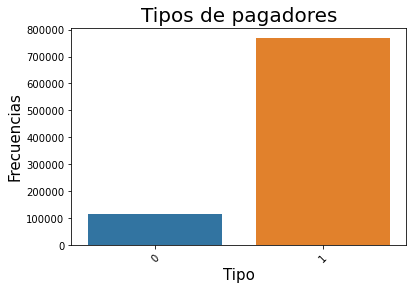

In [37]:
g= sns.countplot(df["loan_status"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Tipos de pagadores", fontsize=20)
g.set_xlabel("Tipo", fontsize=15)
g.set_ylabel("Frecuencias", fontsize=15)

Analizamos el resto de variables para tranformar aquellas que sean necesarias. Para saber cuáles son las que hay que recodificar vamos a usar `dtypes`.

In [38]:
df.dtypes

emp_title                object
emp_length              float64
dti                     float64
annual_inc              float64
home_ownership           object
sub_grade               float64
term                    float64
int_rate                float64
installment             float64
loan_status               int32
total_acc               float64
purpose                  object
addr_state               object
fico_range_low          float64
fico_range_high         float64
initial_list_status      object
pub_rec                 float64
pub_rec_bankruptcies    float64
loan_amnt               float64
mort_acc                float64
dtype: object

Recodificaremos alguna de las variables que son de tipo object para transformarlas a numérica.

In [39]:
from sklearn.preprocessing import LabelEncoder

#### Variable 'home_ownership'

In [40]:
df['home_ownership'].value_counts()

MORTGAGE     439600
RENT         350505
OWN           94752
ANY              16
SIN VALOR         8
NONE              3
Name: home_ownership, dtype: int64

In [41]:
encoder = LabelEncoder()
df['home_ownership'] = encoder.fit_transform(df['home_ownership'])+1
df.head()

,emp_title,emp_length,dti,annual_inc,home_ownership,sub_grade,term,int_rate,installment,loan_status,total_acc,purpose,addr_state,fico_range_low,fico_range_high,initial_list_status,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc
0,SIN VALOR,10.0,21.61,10000.0,4,1.0,36.0,12.62,77.08,1,6.0,credit_card,NY,700.0,704.0,w,0.0,0.0,2300.0,0.0
1,teacher,10.0,25.61,94000.0,2,1.0,60.0,12.62,360.95,1,26.0,debt_consolidation,MA,715.0,719.0,w,0.0,0.0,16000.0,7.0
2,Front Office,7.0,8.88,46350.0,2,4.0,36.0,15.05,209.01,1,27.0,home_improvement,MA,700.0,704.0,w,0.0,0.0,6025.0,2.0
3,Manager,10.0,27.06,44000.0,5,1.0,36.0,9.44,652.91,1,19.0,car,CA,760.0,764.0,w,0.0,0.0,20400.0,0.0
4,Paramedic,10.0,6.79,85000.0,2,5.0,36.0,11.99,431.73,1,24.0,debt_consolidation,MN,660.0,664.0,w,0.0,0.0,13000.0,1.0


In [42]:
encoder.classes_

array(['ANY', 'MORTGAGE', 'NONE', 'OWN', 'RENT', 'SIN VALOR'],
      dtype=object)

Se han asignado los siguientes valores:
- ANY = 1
- MORTAGE = 2
- NONE = 3
- OWN = 4
- RENT = 5
- SIN VALOR = 6

#### Variable 'Purpose'

In [43]:
df['purpose'].value_counts()

debt_consolidation    520846
credit_card           202697
home_improvement       57294
other                  45655
major_purchase         17048
medical                 9836
car                     8144
small_business          7941
vacation                5801
moving                  5788
house                   3318
renewable_energy         494
wedding                   13
SIN VALOR                  8
educational                1
Name: purpose, dtype: int64

In [44]:
encoder_2 = LabelEncoder()
df['purpose'] = encoder_2.fit_transform(df['purpose'])+1
df.head()

,emp_title,emp_length,dti,annual_inc,home_ownership,sub_grade,term,int_rate,installment,loan_status,total_acc,purpose,addr_state,fico_range_low,fico_range_high,initial_list_status,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc
0,SIN VALOR,10.0,21.61,10000.0,4,1.0,36.0,12.62,77.08,1,6.0,3,NY,700.0,704.0,w,0.0,0.0,2300.0,0.0
1,teacher,10.0,25.61,94000.0,2,1.0,60.0,12.62,360.95,1,26.0,4,MA,715.0,719.0,w,0.0,0.0,16000.0,7.0
2,Front Office,7.0,8.88,46350.0,2,4.0,36.0,15.05,209.01,1,27.0,6,MA,700.0,704.0,w,0.0,0.0,6025.0,2.0
3,Manager,10.0,27.06,44000.0,5,1.0,36.0,9.44,652.91,1,19.0,2,CA,760.0,764.0,w,0.0,0.0,20400.0,0.0
4,Paramedic,10.0,6.79,85000.0,2,5.0,36.0,11.99,431.73,1,24.0,4,MN,660.0,664.0,w,0.0,0.0,13000.0,1.0


In [45]:
encoder_2.classes_

array(['SIN VALOR', 'car', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase',
       'medical', 'moving', 'other', 'renewable_energy', 'small_business',
       'vacation', 'wedding'], dtype=object)

Los valores se han asignado como en la variable anterior, es decir, el valor = 1 corresponde a 'SIN VALOR', el valor = 2 corresponde a 'car' y asi sucesivamente hasta el valor 15 correspondiente a 'wedding'.

#### Variable 'initial_list_status'

In [46]:
df['initial_list_status'].value_counts()

w            568999
f            315877
SIN VALOR         8
Name: initial_list_status, dtype: int64

In [47]:
encoder_3 = LabelEncoder()
df['initial_list_status'] = encoder_3.fit_transform(df['initial_list_status'])+1
df.head(-3)

,emp_title,emp_length,dti,annual_inc,home_ownership,sub_grade,term,int_rate,installment,loan_status,total_acc,purpose,addr_state,fico_range_low,fico_range_high,initial_list_status,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc
0,SIN VALOR,10.0,21.61,10000.0,4,1.0,36.0,12.62,77.08,1,6.0,3,NY,700.0,704.0,3,0.0,0.0,2300.0,0.0
1,teacher,10.0,25.61,94000.0,2,1.0,60.0,12.62,360.95,1,26.0,4,MA,715.0,719.0,3,0.0,0.0,16000.0,7.0
2,Front Office,7.0,8.88,46350.0,2,4.0,36.0,15.05,209.01,1,27.0,6,MA,700.0,704.0,3,0.0,0.0,6025.0,2.0
3,Manager,10.0,27.06,44000.0,5,1.0,36.0,9.44,652.91,1,19.0,2,CA,760.0,764.0,3,0.0,0.0,20400.0,0.0
4,Paramedic,10.0,6.79,85000.0,2,5.0,36.0,11.99,431.73,1,24.0,4,MN,660.0,664.0,3,0.0,0.0,13000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884876,KYC Business Analyst,1.0,23.69,63000.0,2,5.0,36.0,11.99,398.52,0,61.0,3,OH,685.0,689.0,2,0.0,0.0,12000.0,1.0
884877,Office Assistant,8.0,28.69,31000.0,5,5.0,36.0,11.99,332.10,1,15.0,4,CA,670.0,674.0,2,1.0,0.0,10000.0,0.0
884878,Director of Maintenance,10.0,3.90,79000.0,2,5.0,36.0,11.99,797.03,1,23.0,6,NJ,660.0,664.0,2,0.0,0.0,24000.0,4.0
884879,Radiologist Technologist,5.0,30.90,35000.0,5,2.0,60.0,15.99,316.07,0,22.0,4,TN,680.0,684.0,3,1.0,1.0,13000.0,0.0


In [48]:
encoder_3.classes_

array(['SIN VALOR', 'f', 'w'], dtype=object)

Se asignaron los valores 1 para 'SIN VALOR', 2 para 'f' y 3 para 'w'.

A continuación, vamos a calcular todas las correlaciones de la variable independiente con la variable transformada.

In [49]:
correlacion_loan = df.corr()
correlacion_loan["loan_status"].sort_values(ascending=False)

loan_status             1.000000
fico_range_low          0.115781
fico_range_high         0.115780
initial_list_status     0.059444
mort_acc                0.039874
annual_inc              0.019717
emp_length              0.003375
purpose                -0.007683
sub_grade              -0.008049
total_acc              -0.016492
pub_rec                -0.019224
pub_rec_bankruptcies   -0.019910
installment            -0.027376
loan_amnt              -0.027554
dti                    -0.051026
home_ownership         -0.054150
term                   -0.093690
int_rate               -0.196847
Name: loan_status, dtype: float64

# ALGORITMOS DE CLASIFICACIÓN

In [50]:
import sklearn
from sklearn import metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

En este apartado, realizaremos todos los algoritmos de clasificación. Estos algoritmos serán **Regresión Logística, K-NN y árbol de decisión simple**.

Al tener datos desbalanceados, con un 20% de observaciones con valor 'loan_status'=1, decidimos realizar un ajuste de desbalanceo en los modelos.

En los modelos **Regresion Logistica** y **Árbol de decisión simple**, la propia función del modelo tiene un parámetro que realiza este ajuste, asignando pesos a las observaciones para qué éstas estén 'equilibradas'. En el caso del modelo **k-NN**

Las variables que vamos a usar para realizar los siguientes modelos son: **'emp_title',
 'emp_length',
 'dti',
 'annual_inc',
 'home_ownership',
 'sub_grade',
 'term',
 'int_rate',
 'installment',
 'loan_status',
 'total_acc',
 'purpose',
 'addr_state',
 'fico_range_low',
 'fico_range_high',
 'initial_list_status',
 'pub_rec',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'mort_acc'**

### 1. Regresión Logística

Definimos los datos del modelo con todas las variables que hemos seleccionado previamente las cuáles creemos que a priori mejor predicen el valor de la variable `loan_status`.

In [51]:
X=df.loc[:,[
 'emp_length',
 'dti',
 'annual_inc',
 'home_ownership',
 'sub_grade',
 'term',
 'int_rate',
 'installment',
 'total_acc',
 'purpose',
 'fico_range_low',
 'fico_range_high',
 'initial_list_status',
 'pub_rec',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'mort_acc']].values
y=df['loan_status'].values

Importamos los módulos para realizar la partición de datos de train y test.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Construimos el modelo de regresión logística para las variables definidas anteriormente.

In [53]:
from sklearn.linear_model import LogisticRegression

#defino el algoritmo a utilizar con los datos balanceados
algoritmo = LogisticRegression(class_weight = "balanced")
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#realizo una prediccion
y_pred = algoritmo.predict(X_test)

In [54]:
print('Coeficientes: ', algoritmo.coef_)
print('Término independiente: ', algoritmo.intercept_)

Coeficientes:  [[-2.01211445e-04 -1.47086235e-02  1.71364266e-06 -6.69508020e-03
  -1.12324519e-03 -5.24936570e-02 -4.93877817e-02 -5.15233979e-03
  -1.81174696e-03 -3.96315249e-03  2.89164408e-03  1.71769967e-03
   1.28842911e-03 -9.84854750e-04 -5.12065468e-04  1.57040656e-04
   4.98325402e-03]]
Término independiente:  [-0.00029383]


Aquí obtenemos los coeficientes de la recta. Podemos ver que las variables **annual_inc, fico_range_low, fico_range_high, initial_list_status, loan_amnt y mort_acc** tienen una relación directa con **loan_status** mientras que el resto de variables tienen una relación inversa.

Además, el término independiente para este modelo es negativo.

La variable con más importancia es **pub_rec**.

Ahora analizaremos las **métricas**: accuracy, precision, recall, confusion matrix, f-score, curva ROC y área bajo la curva.

Comenzamos a calcular la exactitud del modelo.

In [57]:
#Calculo de accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo: ', accuracy)

Exactitud del modelo:  0.6545822338495962


Según la exactitud, el modelo acierta el 65% de las veces. Hay que tener en cuenta que esta métrica no funciona correctamente cuando las clases están desbalanceadas. 

Ahora, procedemos al cálculo de la precisión del modelo.

In [58]:
#Calculo de la precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision del modelo: ', precision)

Precision del modelo:  0.9117334974007794


La precisión del modelo nos mide la calidad del modelo en tareas de clasificación. La precisión de este modelo es del 91%, la cual es bastante alta. 

Ahora, calculamos la sensibilidad del modelo.

In [59]:
#Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo: ', sensibilidad)

Sensibilidad del modelo:  0.6662018998970564


Obtenemos una sensibilidad de 0.668. Este dato es muy similar al dato de la exactitud del modelo pero muy diferente con el dato de la precision del modelo.

A continuación, calculamos la matriz de confusion.

In [63]:
#Calculo de la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('matriz de confusión:')
print(matriz)

matriz de confusión:
[[ 13759   9735]
 [ 50909 102574]]


La matriz nos indica que cuenta con 13759 datos verdaderos positivos, es decir que en los datos reales eran 1 y el modelo los predijo correctamente. 

Por otra parte, tenemos 102574 datos verdaderos negativos, esto quiere decir datos reales que eran 0 y el modelo los predijo como tal.

Ahora analizamos los datos que el modelo no ha predecido bien. Comenzamos con los datos falsos negativos, en total fueron 9735, esto quiere decir que eran 1 pero el modelo los predijo como 0. En cuanto a los falsos positivos, tenemos 50909, que eran en realidad 0 y el modelo los predijo como 1.

La matriz nos indica que 60644 no se han predecido correctamente. Es una cantidad de datos bastante alta. Hay que tener en cuenta que aquí sólo estamos evaluando el conjunto de datos de pruebas que representa solamente el 20% de nuestros datos.

Ahora, calculamos el puntaje del modelo.

In [60]:
#Calculo del puntaje F1 del modelo
from sklearn.metrics import f1_score
puntaje_f1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo: ', puntaje_f1)

Puntaje F1 del modelo:  0.7698649630502465


Esta métrica combina la precisión y el recall en una sola medida. Obtenemos un puntaje de 0.77 que se encuentra entre el valor de la precision y de la sensibilidad. Parece lógico, ya que tenemos una precisión bastante alta y una sensibilidad baja.

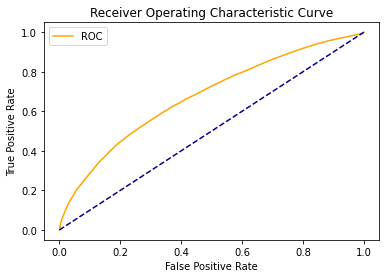

In [62]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
y_prob = algoritmo.predict_proba(X_test)
y_prob = y_prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, y_prob)
plot_roc_curve(fper, tper)

La curva ROC se representa mediante una gráfica, la cual enfrenta el ratio de falsos positivos (eje x) con el ratio de falsos negativos (eje y). Cuanto más se acerque la curva a la esquina izquierda del gráfico, mayor calidad del modelo. Nuestra curva no se acerca mucho a la esquina superior izquierda por lo que el modelo no tiene mucha calidad.

Por último, calculamos el área bajo la curva.

In [63]:
#Area bajo la curva
from sklearn.metrics import roc_auc_score
area = roc_auc_score(y_test, y_prob)
print('El area bajo la curva es: ', area)

El area bajo la curva es:  0.6745725175329118


Este coeficiente va asociado a la curva ROC. Esta métrica se utiliza como un resumen del rendimiento del modelo. Cuanto más esté hacia la izquierda la curva, más área habrá contenida bajo ella y por tanto, mejor será la clasificación. Nuestra área es 0.67, un valor bajo por lo que la clasificación no es muy buena. 

En conclusión, la métrica que da mejores resultados para este modelo es la precisión. Dicha métrica mide la calidad del modelo, además de destacar por encima del resto de métricas. La segunda métrica que devuelve mejores resultados es F-SCORE. Y el resto de métricas devuelven resultados muy parecidos entre ellas.